<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Speed-benchmarking" data-toc-modified-id="Speed-benchmarking-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Speed benchmarking</a></span></li></ul></div>

## Speed benchmarking

In [71]:
%matplotlib inline

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def _get_ones(x, y):
    return np.ones((x, y))

def _ext_A(A):
    nA, dim = A.shape
    A_ext = _get_ones(nA, dim * 3)
    A_ext[:, dim : 2 * dim] = A
    A_ext[:, 2 * dim :] = A ** 2
    return A_ext

def _ext_B(B):
    nB, dim = B.shape
    B_ext = _get_ones(dim * 3, nB)
    B_ext[:dim] = (B ** 2).T
    B_ext[dim : 2 * dim] = -2.0 * B.T
    del B
    return B_ext

def _euclidean(A_ext, B_ext):
    sqdist = A_ext.dot(B_ext).clip(min=0)
    return np.sqrt(sqdist)

def _euclidean_squared(A_ext, B_ext):
    sqdist = A_ext.dot(B_ext).clip(min=0)
    return sqdist

def _norm(A):
    return A / np.linalg.norm(A, ord=2, axis=1, keepdims=True)

def _cosine(A_norm_ext, B_norm_ext):
    return A_norm_ext.dot(B_norm_ext).clip(min=0) / 2

def prev_euclidean(X,Y):
    X_ext = _ext_A(X)
    Y_ext = _ext_B(Y)
    return _euclidean(X_ext, Y_ext)

def prev_euclidean_squared(X,Y):
    X_ext = _ext_A(X)
    Y_ext = _ext_B(Y)
    return _euclidean_squared(X_ext, Y_ext)

def new_euclidean_squared(X, Y):
    dists = np.sum(Y**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis] -2*np.dot(X, Y.T)
    return np.sqrt(dists)

In [111]:
n_X_list = [1, 8, 32, 128, 256]
n_Y_list = [100, 1000, 5000, 10000, 20000]
n_Feat = [100, 250, 500, 1000]
old_times = []
prev_times = []
nXYD = []

for n_features in n_Feat:
    for n_X in n_X_list:
        for n_Y in n_Y_list:
            X = np.random.random((n_X, n_features)).astype(np.float32)
            Y = np.random.random((n_Y, n_features)).astype(np.float32)
            nXYD.append((n_X, n_Y,n_features))
            
            new_time = %timeit -o new_euclidean_squared(X, Y)
            new_times.append(new_time)
            
            prev_time =  %timeit -o prev_euclidean_squared(X, Y)
            prev_times.append(prev_time)

24.1 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.9 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
95.9 µs ± 6.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
477 µs ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
470 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.26 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.64 ms ± 78.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.8 ms ± 351 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.15 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
24.6 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
39.4 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
83.4 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
155 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
549 µs ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 10

34.5 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.2 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
78.5 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.4 ms ± 758 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
235 ms ± 7.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
97.1 µs ± 8.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
368 µs ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
897 µs ± 137 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.73 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.53 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.6 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.9 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
77.9 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.4 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
237 ms

In [112]:
H = [x.average for x in prev_times]
B = [x.average for x in new_times]

In [115]:
df = pd.DataFrame({'Old':H, 'New':B, 'nXnYnD':nXYD})

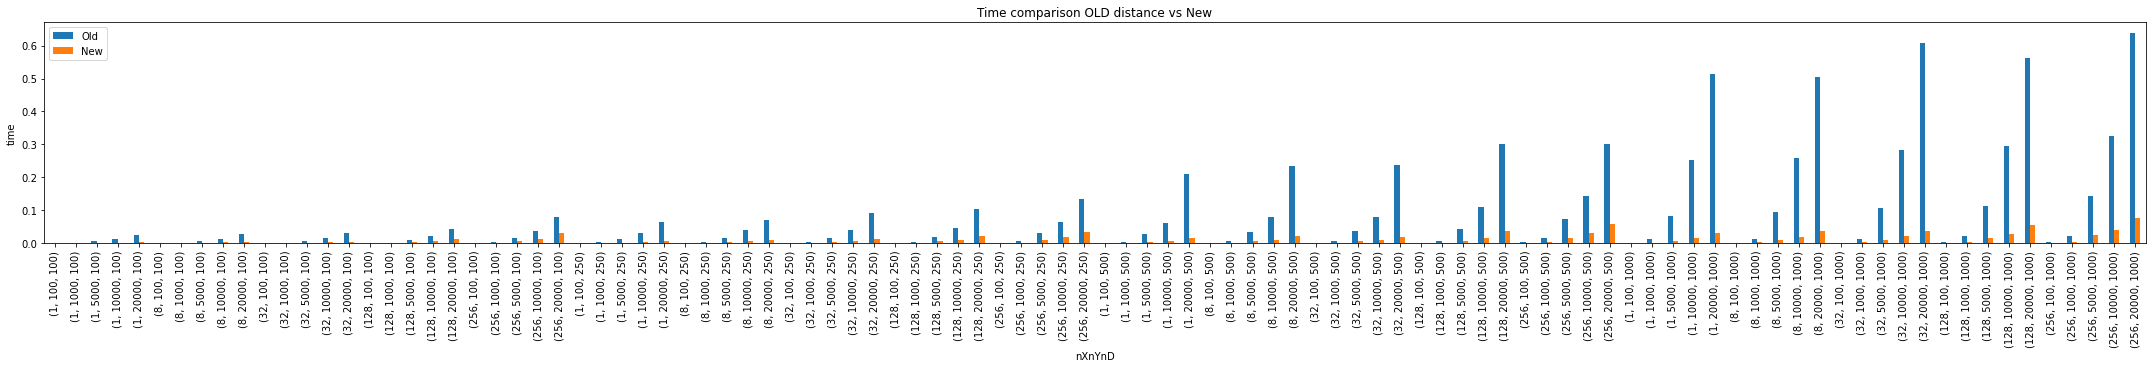

In [125]:
df.set_index('nXnYnD').plot(kind='bar', figsize=(30,5))
plt.ylabel('time')
plt.tight_layout()
plt.title('Time comparison OLD distance vs New')
plt.savefig('results_time.pdf')

In [118]:
df.to_csv('old_new_times.csv')

In [126]:
improvement_X = np.array(H)/np.array(B) 

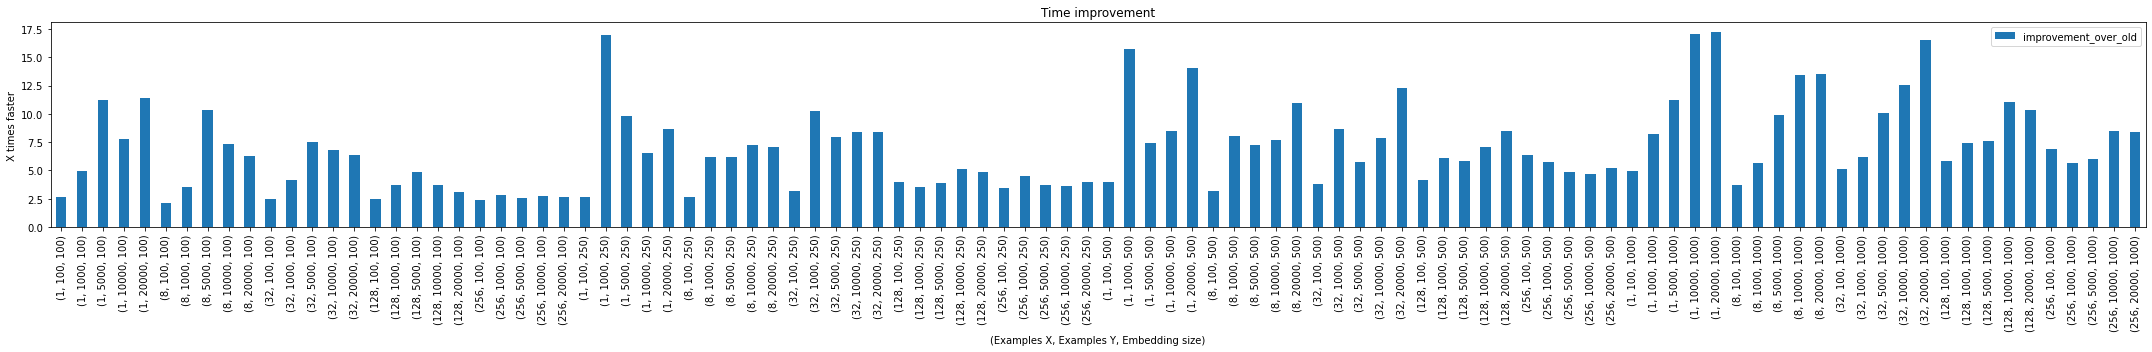

In [136]:
df = pd.DataFrame({ 'nXnYnD':nXYD, 'improvement_over_old':improvement_X})
df.set_index('nXnYnD').plot(kind='bar',figsize=(30,5))
#df.set_index('nXnYnD').plot(kind='barh', figsize=(5,30))
plt.ylabel('X times faster')
plt.xlabel('(Examples X, Examples Y, Embedding size)')
plt.title('Time improvement')
plt.tight_layout()
plt.savefig('results_x_times.pdf')

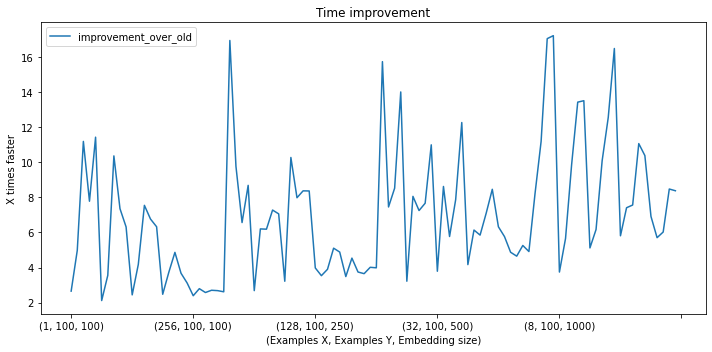

In [135]:
df = pd.DataFrame({ 'nXnYnD':nXYD, 'improvement_over_old':improvement_X})
df.set_index('nXnYnD').plot(figsize=(10,5))
#df.set_index('nXnYnD').plot(kind='barh', figsize=(5,30))
plt.ylabel('X times faster')
plt.xlabel('(Examples X, Examples Y, Embedding size)')
plt.title('Time improvement')
plt.tight_layout()
plt.savefig('results_line.pdf')